In [1]:
import numpy as np
import pandas as pd

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [13]:
file_path = "/Users/igmark/Desktop/DS4A_Data/2020OwnershipPaymentData.csv"
df = pd.read_csv(file_path, nrows=10000)

In [14]:
df

,Change_Type,Physician_Profile_ID,Physician_NPI,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,Recipient_Primary_Business_Street_Address_Line1,Recipient_Primary_Business_Street_Address_Line2,Recipient_City,...,Value_of_Interest,Terms_of_Interest,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Dispute_Status_for_Publication,Interest_Held_by_Physician_or_an_Immediate_Family_Member,Payment_Publication_Date
0,UNCHANGED,1187636,1.962423e+09,Dhananjaya,NaN,Kamisetti,NaN,30 S Cayuga Rd,NaN,Williamsville,...,656068.0,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
1,UNCHANGED,795781,1.194775e+09,Sharad,NaN,Lakdawala,NaN,2908 W Waters Ave,101,Tampa,...,326530.0,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
2,UNCHANGED,1031473,1.467643e+09,Kenneth,NaN,Liszewski,NaN,1880 Arlington St,Ste 205,Sarasota,...,653060.0,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
3,UNCHANGED,372257,1.295736e+09,Jose,NaN,Matos,NaN,EDIF Capital Center,Hostos 239,San Juan,...,392346.0,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
4,UNCHANGED,658330,1.356395e+09,Mark,NaN,McCutcheon,NaN,5100 Rangeline Service Rd N,Tillman's Corner,Mobile,...,238548.0,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372,UNCHANGED,156605,1.467506e+09,Todd,NaN,Lanman,NaN,120 S SPALDING DR SUITE 400,NaN,BEVERLY HILLS,...,25200.0,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023
3373,UNCHANGED,333593,1.346246e+09,Marc,NaN,Loev,NaN,11921 ROCKVILLE PIKE SUITE 505,NaN,ROCKVILLE,...,38363.3,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023
3374,UNCHANGED,44097,1.962568e+09,David,NaN,Maine,NaN,301 SAINT PAUL PL BURK BUILDING 321,NaN,Baltimore,...,9450.0,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023
3375,UNCHANGED,23346,1.528154e+09,David,NaN,Mohler,NaN,"300 PASTEUR DR ROOM, R111",NaN,Standford,...,37800.0,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023


In [15]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 30 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Change_Type                                                       3377 non-null   object 
 1   Physician_Profile_ID                                              3377 non-null   int64  
 2   Physician_NPI                                                     3376 non-null   float64
 3   Physician_First_Name                                              3377 non-null   object 
 4   Physician_Middle_Name                                             1024 non-null   object 
 5   Physician_Last_Name                                               3377 non-null   object 
 6   Physician_Name_Suffix                                             313 non-null    object 
 7   Recipient_Primary_Business_Street

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3372    False
3373    False
3374    False
3375    False
3376    False
Length: 3377, dtype: bool

In [17]:
df.isnull().sum()

Change_Type                                                            0
Physician_Profile_ID                                                   0
Physician_NPI                                                          1
Physician_First_Name                                                   0
Physician_Middle_Name                                               2353
Physician_Last_Name                                                    0
Physician_Name_Suffix                                               3064
Recipient_Primary_Business_Street_Address_Line1                        0
Recipient_Primary_Business_Street_Address_Line2                     2096
Recipient_City                                                         0
Recipient_State                                                        0
Recipient_Zip_Code                                                     0
Recipient_Country                                                      0
Recipient_Province                                 

In [18]:
df.drop(columns=['Physician_Name_Suffix', 'Recipient_Primary_Business_Street_Address_Line1',
                'Recipient_Primary_Business_Street_Address_Line2', 'Physician_Middle_Name','Recipient_Country', 'Recipient_Province', 
                 'Recipient_Postal_Code'], inplace=True)


In [19]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Change_Type                                                       3377 non-null   object 
 1   Physician_Profile_ID                                              3377 non-null   int64  
 2   Physician_NPI                                                     3376 non-null   float64
 3   Physician_First_Name                                              3377 non-null   object 
 4   Physician_Last_Name                                               3377 non-null   object 
 5   Recipient_City                                                    3377 non-null   object 
 6   Recipient_State                                                   3377 non-null   object 
 7   Recipient_Zip_Code               

In [20]:
df.columns

Index(['Change_Type', 'Physician_Profile_ID', 'Physician_NPI',
       'Physician_First_Name', 'Physician_Last_Name', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Physician_Primary_Type',
       'Physician_Specialty', 'Record_ID', 'Program_Year',
       'Total_Amount_Invested_USDollars', 'Value_of_Interest',
       'Terms_of_Interest',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Dispute_Status_for_Publication',
       'Interest_Held_by_Physician_or_an_Immediate_Family_Member',
       'Payment_Publication_Date'],
      dtype='object')

In [21]:
 df.isnull().sum()

Change_Type                                                          0
Physician_Profile_ID                                                 0
Physician_NPI                                                        1
Physician_First_Name                                                 0
Physician_Last_Name                                                  0
Recipient_City                                                       0
Recipient_State                                                      0
Recipient_Zip_Code                                                   0
Physician_Primary_Type                                               0
Physician_Specialty                                                 77
Record_ID                                                            0
Program_Year                                                         0
Total_Amount_Invested_USDollars                                      0
Value_of_Interest                                                    0
Terms_

In [ ]:
df['Physician_NPI'] = df['Physician_NPI'].astype('object')

In [22]:
df['Recipient_Zip_Code'] = df['Recipient_Zip_Code'].astype(str).str[:5]

In [24]:
print(df['Recipient_Zip_Code'])

0       14221
1       33614
2       34239
3       00918
4       36619
        ...  
3372    90212
3373    20852
3374    21202
3375    94305
3376    33558
Name: Recipient_Zip_Code, Length: 3377, dtype: object


In [26]:
df['Total_Amount_Invested_USDollars'] = df['Total_Amount_Invested_USDollars'].round(2)

In [27]:
print(df['Total_Amount_Invested_USDollars'])

0       115295.0
1        51012.5
2       102025.0
3        76552.5
4        46545.0
          ...   
3372         0.0
3373     49995.0
3374         0.0
3375         0.0
3376         0.0
Name: Total_Amount_Invested_USDollars, Length: 3377, dtype: float64


In [28]:
df['Value_of_Interest'] = df['Value_of_Interest'].astype(int)

In [29]:
df.fillna("Not available", inplace=True)

In [30]:
df

,Change_Type,Physician_Profile_ID,Physician_NPI,Physician_First_Name,Physician_Last_Name,Recipient_City,Recipient_State,Recipient_Zip_Code,Physician_Primary_Type,Physician_Specialty,...,Value_of_Interest,Terms_of_Interest,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country,Dispute_Status_for_Publication,Interest_Held_by_Physician_or_an_Immediate_Family_Member,Payment_Publication_Date
0,UNCHANGED,1187636,1962422717.0,Dhananjaya,Kamisetti,Williamsville,NY,14221,Medical Doctor,Allopathic & Osteopathic Physicians|Anesthesio...,...,656068,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
1,UNCHANGED,795781,1194774687.0,Sharad,Lakdawala,Tampa,FL,33614,Medical Doctor,Allopathic & Osteopathic Physicians|Psychiatry...,...,326530,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
2,UNCHANGED,1031473,1467643239.0,Kenneth,Liszewski,Sarasota,FL,34239,Doctor of Dentistry,Dental Providers|Dentist,...,653060,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
3,UNCHANGED,372257,1295736452.0,Jose,Matos,San Juan,PR,00918,Medical Doctor,Allopathic & Osteopathic Physicians|Ophthalmology,...,392346,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
4,UNCHANGED,658330,1356394837.0,Mark,McCutcheon,Mobile,AL,36619,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,...,238548,Common and Preferred Shares,"Romark Laboratories, LC",100000011162,"Romark Laboratories, LC",FL,United States,No,Physician Covered Recipient,01/20/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3372,UNCHANGED,156605,1467506220.0,Todd,Lanman,BEVERLY HILLS,CA,90212,Medical Doctor,Allopathic & Osteopathic Physicians|Physical M...,...,25200,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023
3373,UNCHANGED,333593,1346246089.0,Marc,Loev,ROCKVILLE,MD,20852,Medical Doctor,Allopathic & Osteopathic Physicians|Pain Medic...,...,38363,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023
3374,UNCHANGED,44097,1962568048.0,David,Maine,Baltimore,MD,21202,Medical Doctor,Allopathic & Osteopathic Physicians|Anesthesio...,...,9450,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023
3375,UNCHANGED,23346,1528154424.0,David,Mohler,Standford,CA,94305,Medical Doctor,Allopathic & Osteopathic Physicians|Orthopaedi...,...,37800,Share value,Stimwave Technologies Incorporated,100000136444,Stimwave Technologies Incorporated,FL,United States,No,Physician Covered Recipient,01/20/2023


In [31]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 23 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Change_Type                                                       3377 non-null   object 
 1   Physician_Profile_ID                                              3377 non-null   int64  
 2   Physician_NPI                                                     3377 non-null   object 
 3   Physician_First_Name                                              3377 non-null   object 
 4   Physician_Last_Name                                               3377 non-null   object 
 5   Recipient_City                                                    3377 non-null   object 
 6   Recipient_State                                                   3377 non-null   object 
 7   Recipient_Zip_Code               

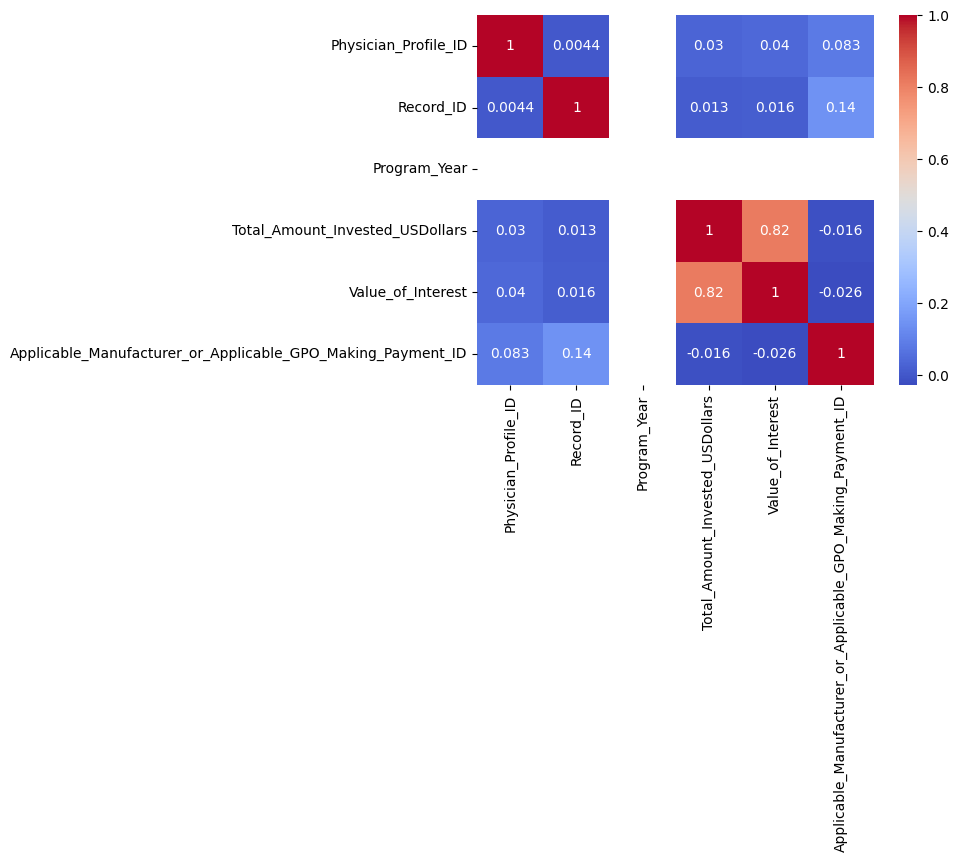

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


<AxesSubplot: >

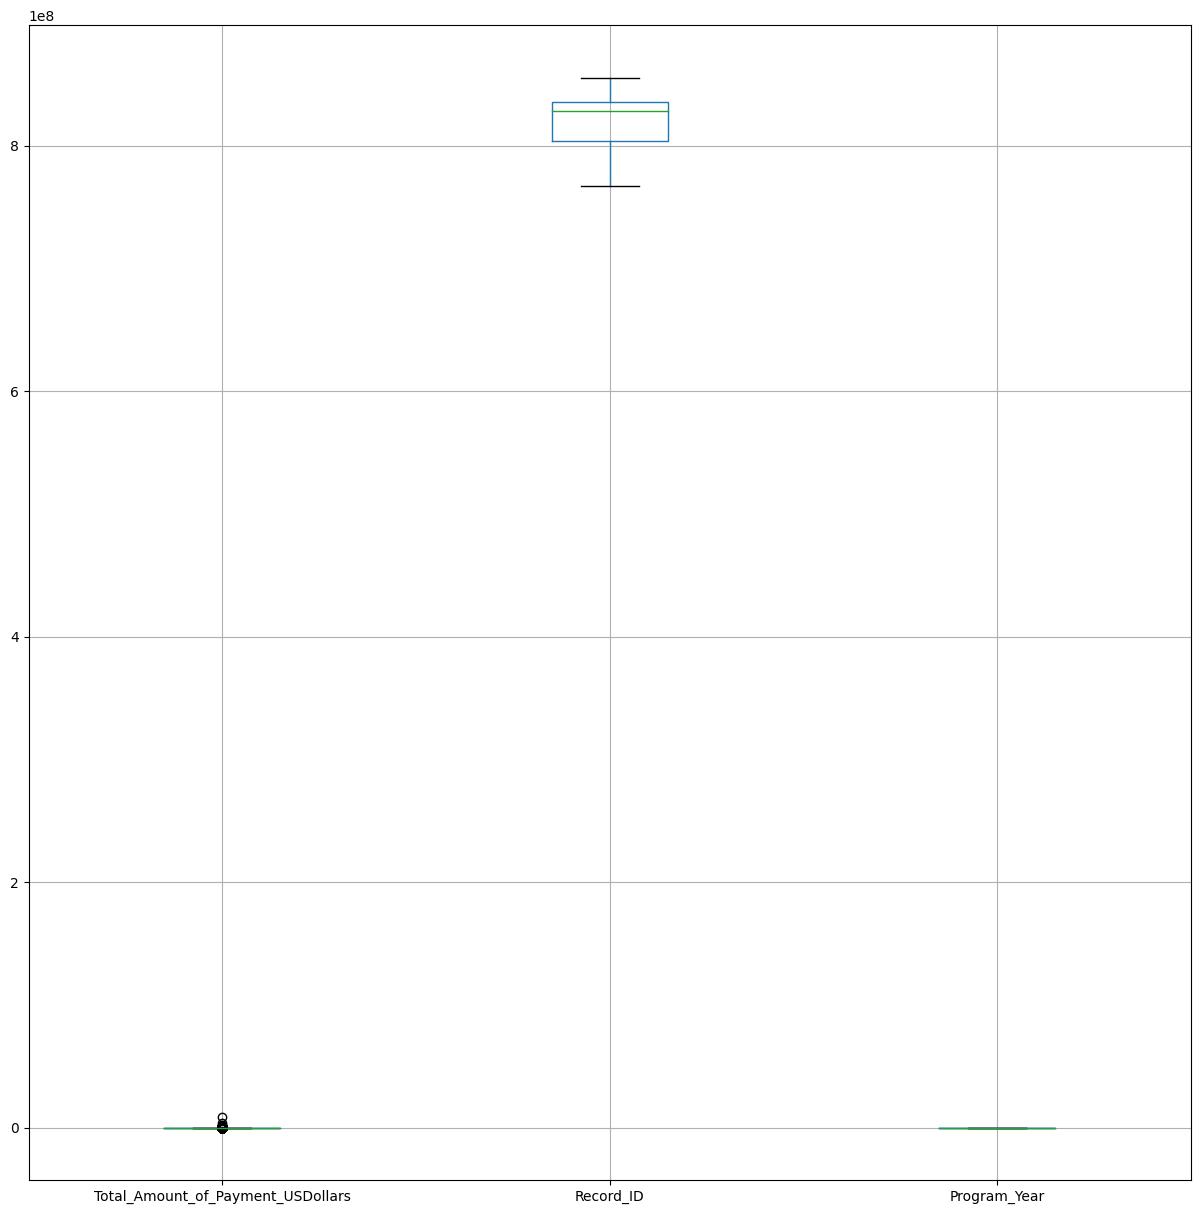

In [58]:
df.boxplot(figsize = (15,15))

array([[<AxesSubplot: title={'center': 'Physician_Profile_ID'}>,
        <AxesSubplot: title={'center': 'Record_ID'}>],
       [<AxesSubplot: title={'center': 'Program_Year'}>,
        <AxesSubplot: title={'center': 'Total_Amount_Invested_USDollars'}>],
       [<AxesSubplot: title={'center': 'Value_of_Interest'}>,
        <AxesSubplot: title={'center': 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID'}>]],
      dtype=object)

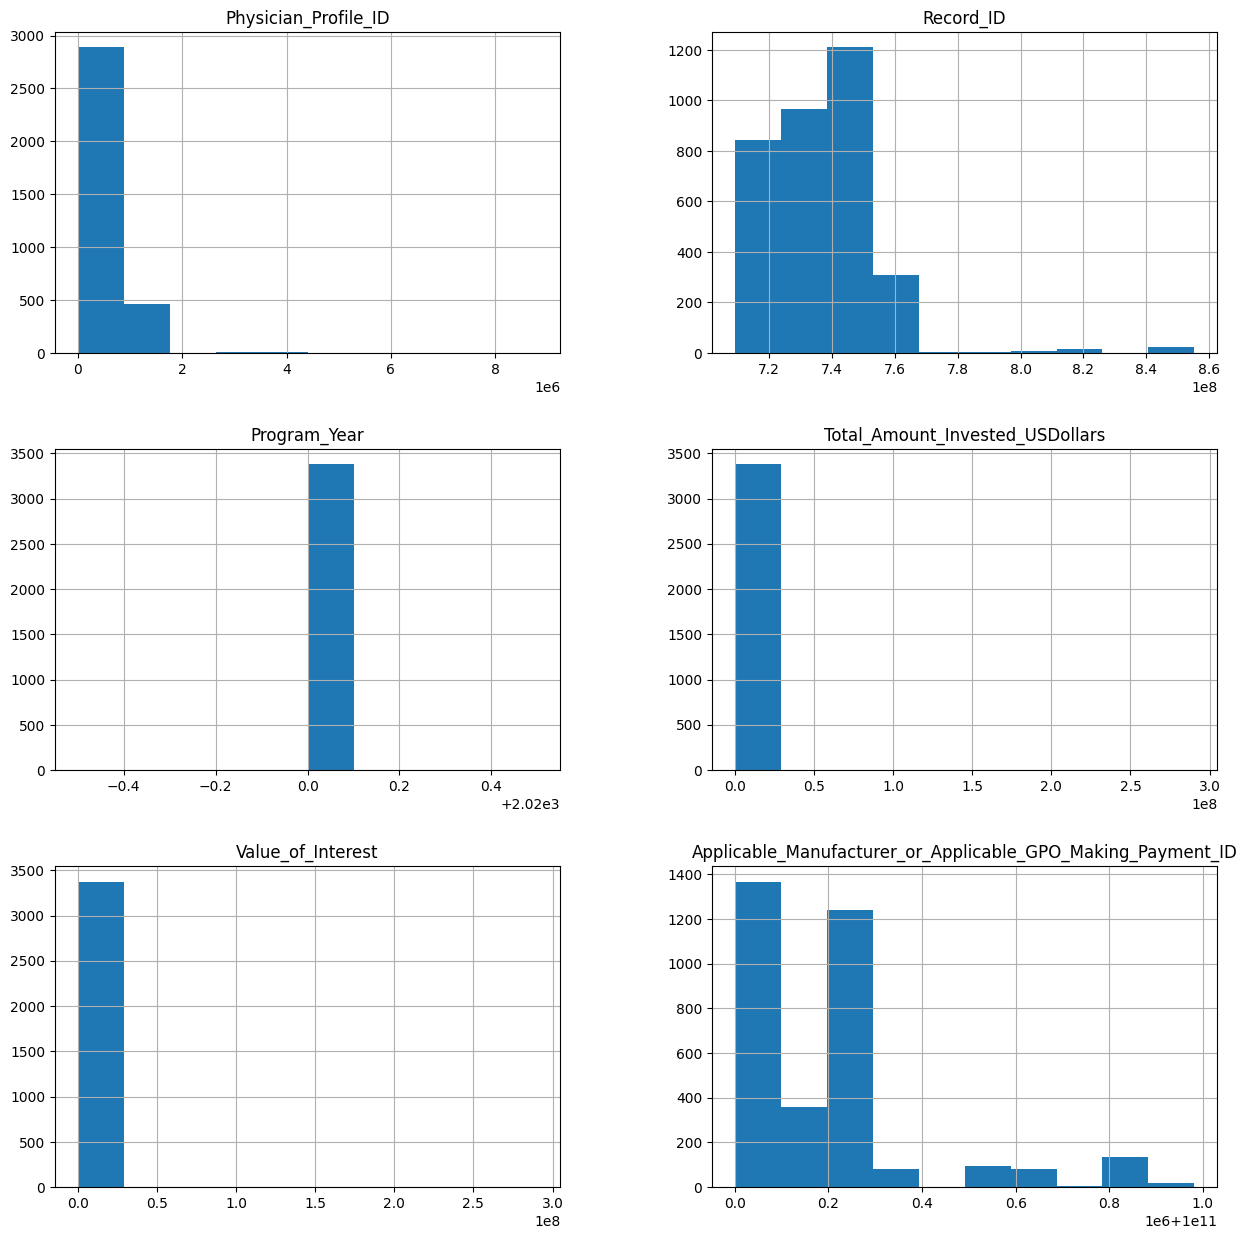

In [33]:
df.hist(figsize = (15,15))

In [34]:
#check for outliers and remove
from scipy import stats

print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(3377, 23)
(0, 23)


In [36]:
#Save to new file 
df.to_csv('2020OwnershipPaymentData_prepared.csv')